In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## setting the start and end date
start_date = '1990-01-01'
end_date = '2023-08-14'
ticker = 'AAPL'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02    0.314732    0.334821    0.312500    0.332589    0.263761   
1990-01-03    0.339286    0.339286    0.334821    0.334821    0.265531   
1990-01-04    0.341518    0.345982    0.332589    0.335938    0.266417   
1990-01-05    0.337054    0.341518    0.330357    0.337054    0.267302   
1990-01-08    0.334821    0.339286    0.330357    0.339286    0.269072   
...                ...         ...         ...         ...         ...   
2023-08-07  182.130005  183.130005  177.350006  178.850006  178.608810   
2023-08-08  179.690002  180.270004  177.580002  179.800003  179.557526   
2023-08-09  180.869995  180.929993  177.009995  178.190002  177.949707   
2023-08-10  179.479996  180.750000  177.600006  177.970001  177.729996   
2023-08-11  177.320007  178.619995  176.550

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8468 entries, 1990-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8468 non-null   float64
 1   High       8468 non-null   float64
 2   Low        8468 non-null   float64
 3   Close      8468 non-null   float64
 4   Adj Close  8468 non-null   float64
 5   Volume     8468 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 463.1 KB


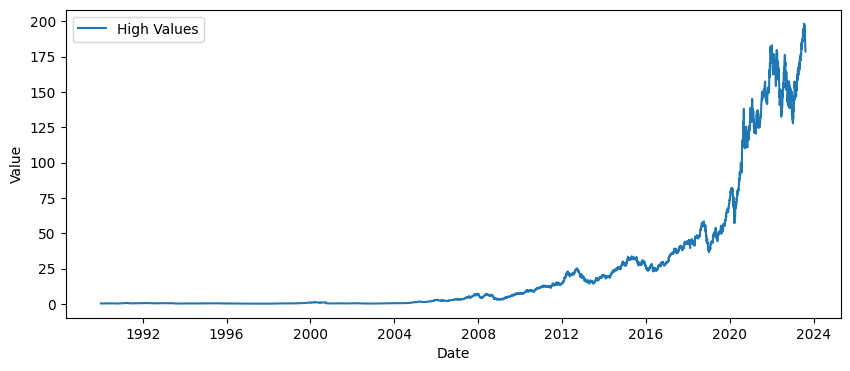

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

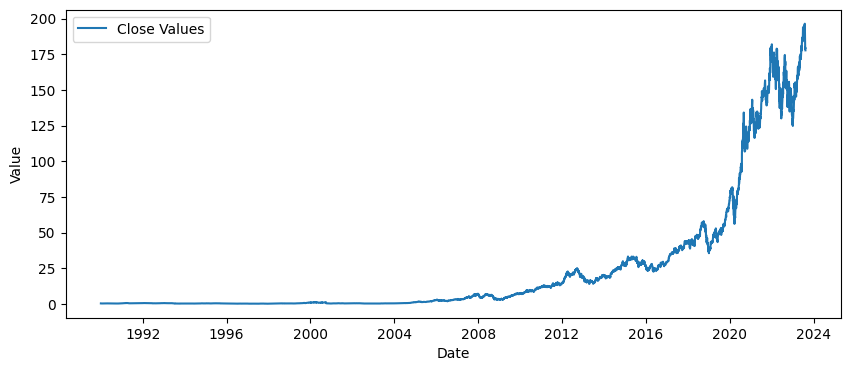

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263761,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265531,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266417,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267302,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269072,101572800
...,...,...,...,...,...,...,...
8463,2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100
8464,2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
8465,2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
8466,2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900


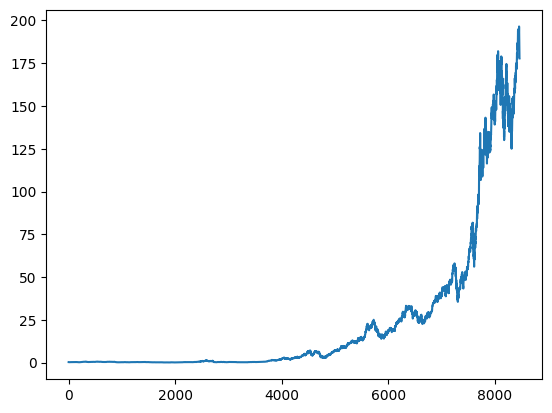

In [ ]:
plt.plot(df.Close)

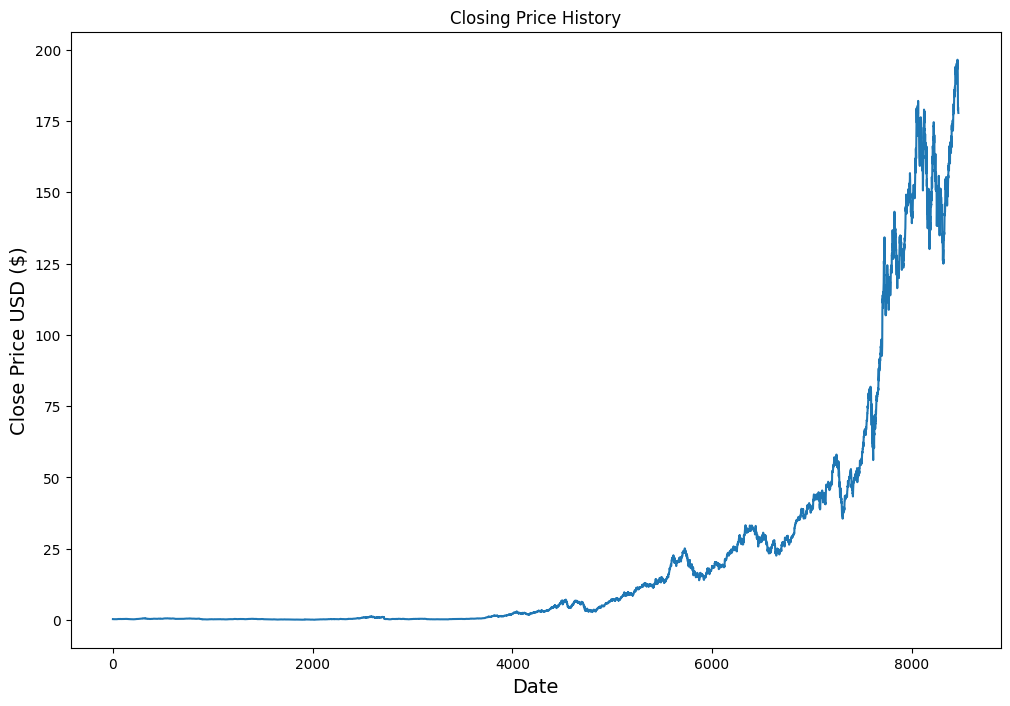

In [ ]:
#visualize the closing price history
plt.figure(figsize=(12,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [ ]:
import math
#create a new dataframe with only the "Close column"
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (95%)
training = math.ceil(len(dataset)*.95)

training

8045

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00110564],
       [0.00111701],
       [0.0011227 ],
       ...,
       [0.90699548],
       [0.90587494],
       [0.90495809]])

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training, :]
#split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(X_train)
        print(y_train)
        print()

[array([0.00110564, 0.00111701, 0.0011227 , 0.00112839, 0.00113975,
       0.0011227 , 0.0010488 , 0.00098059, 0.00098059, 0.00096922,
       0.00099764, 0.00092374, 0.00088395, 0.00096922, 0.00092374,
       0.00094648, 0.00095784, 0.00096353, 0.000901  , 0.00092374,
       0.00095784, 0.00095784, 0.00094079, 0.00096922, 0.00100332,
       0.00099196, 0.00092374, 0.00091237, 0.00096922, 0.00095784,
       0.00098059, 0.00096922, 0.00096922, 0.00094648, 0.00093511,
       0.00095784, 0.00091237, 0.00092374, 0.00095784, 0.00093511,
       0.00095784, 0.00096922, 0.00094648, 0.00098059, 0.00101469,
       0.00102038, 0.00108291, 0.00108859, 0.00107722, 0.00108859,
       0.00109428, 0.00108291, 0.00124207, 0.00133871, 0.00129324,
       0.00130461, 0.00126481, 0.00133303, 0.00133303, 0.00132166])]
[0.0012875528139855198]



In [ ]:
#convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

#reshape the data (MLP expects 2 dimentionals)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train.shape

(7985, 60)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import tensorflow as tf
# Create the regressor model
regressor = Sequential()

# Add the RNN layer
#regressor.add(RNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#regressor.add(SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))


# Add the first RNN-Bidirectional LSTM layer with Dropout regularisation
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.2))

# Adding a GRU layer
#regressor.add(GRU(units=16))

# Add the second RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.3))

# Adding a GRU layer
#regressor.add(GRU(units=18))

# Add the third RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.4))

# Adding a GRU layer
#regressor.add(GRU(units=20))

# Add the fourth RNN-Bidirectional LSTM layer
regressor.add(tf.keras.layers.SimpleRNN(50,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.5))



# Add the output layer
regressor.add(Dense(units=1))
regressor.add(Dense(150, activation='relu', input_dim = 60))
regressor.add(Dense(150, activation='relu'))
regressor.add(Dense(1))


# Compile the RNN
#regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          40400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            7550      
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 100)          40400     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0

In [ ]:
#compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
history = regressor.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
250/250 [==============================] - 119s 349ms/step - loss: 0.0031
Epoch 2/10
250/250 [==============================] - 87s 348ms/step - loss: 9.1578e-04
Epoch 3/10
250/250 [==============================] - 83s 334ms/step - loss: 6.8585e-04
Epoch 4/10
250/250 [==============================] - 87s 347ms/step - loss: 4.4782e-04
Epoch 5/10
250/250 [==============================] - 84s 335ms/step - loss: 5.5476e-04
Epoch 6/10
250/250 [==============================] - 87s 346ms/step - loss: 3.6743e-04
Epoch 7/10
250/250 [==============================] - 83s 333ms/step - loss: 4.0903e-04
Epoch 8/10
250/250 [==============================] - 87s 347ms/step - loss: 3.3022e-04
Epoch 9/10
250/250 [==============================] - 84s 336ms/step - loss: 2.6770e-04
Epoch 10/10
250/250 [==============================] - 86s 345ms/step - loss: 2.2851e-04


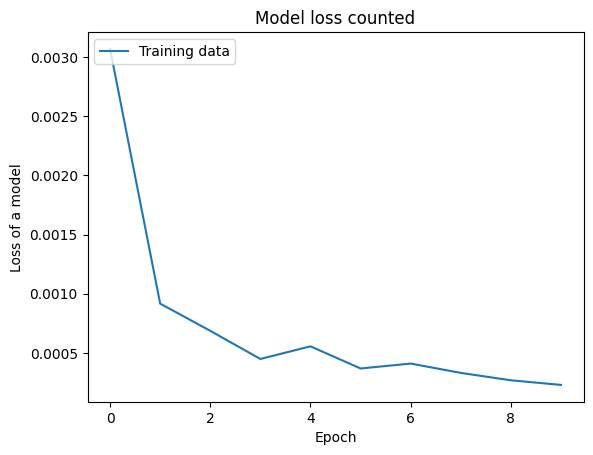

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Test data'], loc='upper left')
plt.show()

In [ ]:
#create the testing data set
#create a new array containing scaled values from index
test_data = scaled_data[training - 60: , : ]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

In [ ]:
#get the models predicted price values
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 5s 92ms/step


In [ ]:
#get the root mean squared error (RMSE) (lower values better fit)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
print(rmse)

17.044206930390487


In [ ]:
mse = (np.mean( predictions - y_test)**2)
print(mse)

290.5049898859711


In [ ]:
from sklearn.metrics import mean_absolute_error
#get the mean absolute error (average of the forecast error values - all of em forced to be positive)
mae = mean_absolute_error(y_test, predictions)
print(mae)

17.408341987195026


In [ ]:
#define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#get MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(mape)

10.393274240573176


<ipython-input-32-4d2a747520e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


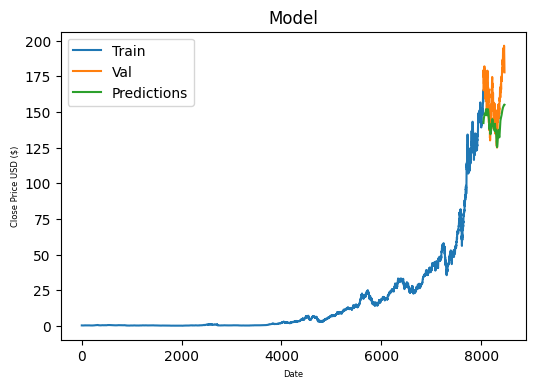

In [ ]:
#plot the data
train = data[:training]
valid = data[training:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(6,4))
plt.title('Model')
plt.xlabel('Date', fontsize = 6)
plt.ylabel('Close Price USD ($)', fontsize=6)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.savefig('mishtha bilstm rnn')
plt.show()

In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predictions[:10]):
    print(f"{date.date()}: {price}")

2023-08-12: [142.21854]
2023-08-13: [142.52837]
2023-08-14: [142.89754]
2023-08-15: [143.36664]
2023-08-16: [143.79974]
2023-08-17: [144.32118]
2023-08-18: [144.8096]
2023-08-19: [145.14645]
2023-08-20: [145.51585]
2023-08-21: [145.79391]


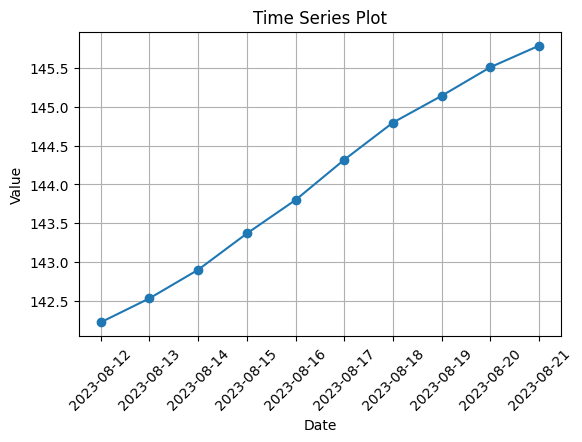

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    142.21854,
    142.52837,
    142.89754,
    143.36664,
    143.79974,
    144.32,
    144.80,
    145.146,
    145.51585,
    145.79391
]

# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('mishtha forecasting')
plt.show()

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## setting the start and end date
start_date = '1990-01-01'
end_date = '2023-08-14'
ticker = 'AAPL'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02    0.314732    0.334821    0.312500    0.332589    0.263761   
1990-01-03    0.339286    0.339286    0.334821    0.334821    0.265531   
1990-01-04    0.341518    0.345982    0.332589    0.335938    0.266417   
1990-01-05    0.337054    0.341518    0.330357    0.337054    0.267302   
1990-01-08    0.334821    0.339286    0.330357    0.339286    0.269072   
...                ...         ...         ...         ...         ...   
2023-08-07  182.130005  183.130005  177.350006  178.850006  178.608810   
2023-08-08  179.690002  180.270004  177.580002  179.800003  179.557526   
2023-08-09  180.869995  180.929993  177.009995  178.190002  177.949707   
2023-08-10  179.479996  180.750000  177.600006  177.970001  177.729996   
2023-08-11  177.320007  178.619995  176.550

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8468 entries, 1990-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8468 non-null   float64
 1   High       8468 non-null   float64
 2   Low        8468 non-null   float64
 3   Close      8468 non-null   float64
 4   Adj Close  8468 non-null   float64
 5   Volume     8468 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 463.1 KB


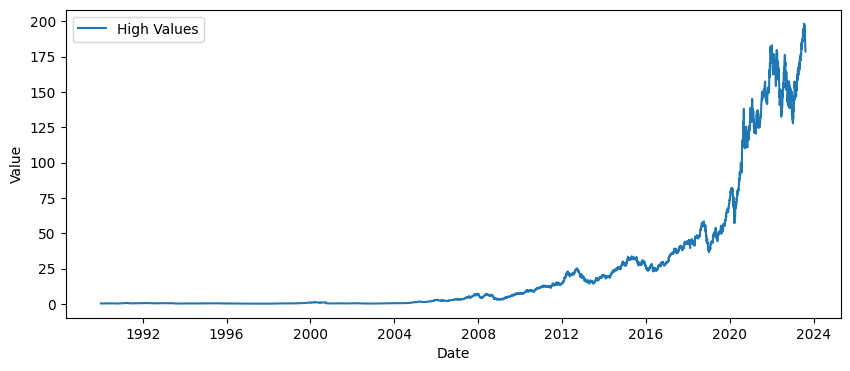

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

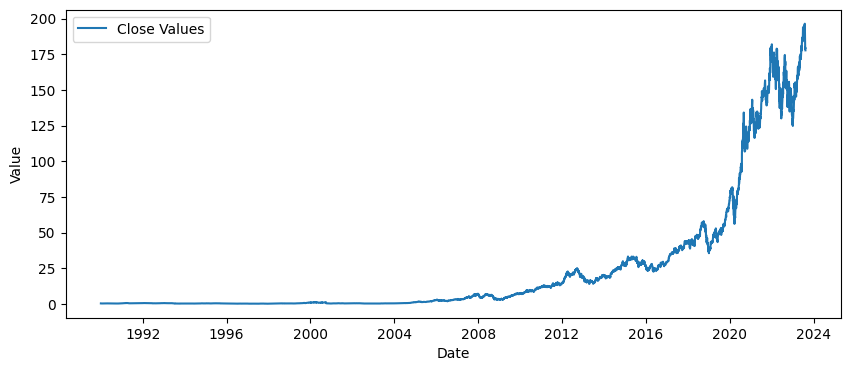

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263761,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265531,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266417,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267302,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269072,101572800
...,...,...,...,...,...,...,...
8463,2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100
8464,2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
8465,2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
8466,2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900


<ipython-input-7-3c852398583e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


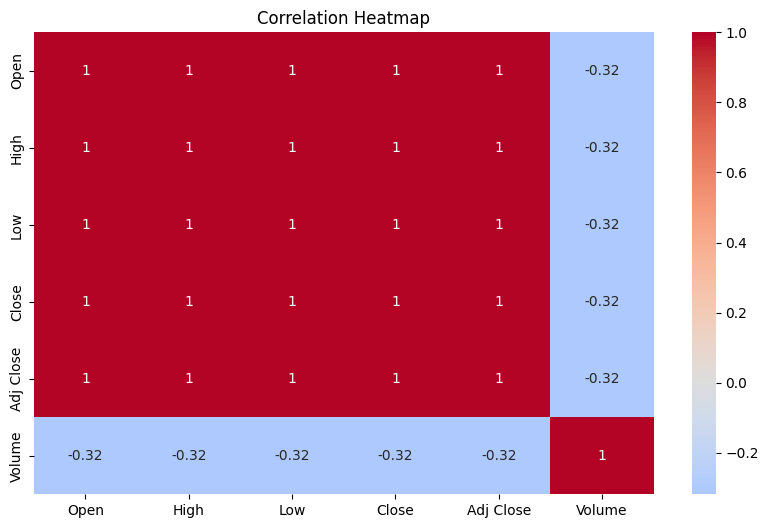

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('heatmap')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):

    #Parameters:
    # y_true (array-like): The ground truth (actual) values.
    # y_pred (array-like): The predicted values.


    return mean_absolute_error(y_true, y_pred) / np.mean(y_true) * 100

In [ ]:
from sklearn.metrics import mean_squared_error

def mean_square_error(y_true, y_pred):
   # y_true (array-like): The ground truth (actual) values.
   #  y_pred (array-like): The predicted values.



    return mean_squared_error(y_true, y_pred)

In [ ]:
import math
def root_mean_square_error(y_true, y_pred):
    RMSE_Value = math.sqrt(mean_squared_error(y_true, y_pred))
    return RMSE_Value


In [ ]:
# Define the size of the training set
train_size = int(len(df) * 0.95)  # 95% of the data for training

# Split the data into training and testing sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print the shapes of the split sets
print(train.shape, test.shape)

(8044, 7) (424, 7)


In [ ]:
training_data = train.filter(['High'])
training_set = training_data.values
testing_data = test.filter(['High'])
testing_set = testing_data.values
print(training_set.shape, testing_set.shape)

(8044, 1) (424, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
scaled_training_set = scaler.fit_transform(training_set)
# Scale the test dataset using the same scaler
scaled_testing_set = scaler.transform(testing_set)

print(scaled_training_set.shape, scaled_testing_set.shape)

(8044, 1) (424, 1)


In [ ]:
step_count = 50
X_train = []
y_train = []

for i in range(len(train) - step_count):
    X_train.append(scaled_training_set[i:i + step_count, 0])
    y_train.append(scaled_training_set[step_count + i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = y_train.reshape(y_train.shape[0])

print(X_train.shape, y_train.shape)


(7994, 50) (7994,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential()

# Add a 1D convolutional layer with 32 filters, kernel size 3, and ReLU activation
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer with pool size 2
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the previous layer
cnn_model.add(Flatten())

# Add a fully connected dense layer with 64 units and ReLU activation
cnn_model.add(Dense(64, activation='relu'))

# Add a final dense layer with 1 unit and linear activation for regression
cnn_model.add(Dense(1, activation='linear'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
cnn_model.summary()

#compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                49216     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
____________________________________________________

In [ ]:
#train the model
history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 6.3258e-04
Epoch 2/20
500/500 [==============================] - 1s 3ms/step - loss: 1.8288e-04
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 1.0908e-04
Epoch 4/20
500/500 [==============================] - 2s 4ms/step - loss: 1.3876e-04
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 1.3354e-04
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 1.1867e-04
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 8.5003e-05
Epoch 8/20
500/500 [==============================] - 1s 3ms/step - loss: 1.0096e-04
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 7.1743e-05
Epoch 10/20
500/500 [==============================] - 1s 3ms/step - loss: 7.6035e-05
Epoch 11/20
500/500 [==============================] - 1s 2ms/step - loss: 7.9134e-05
Epoch 12/20
500/500 [==============================] - 1s 3ms/s

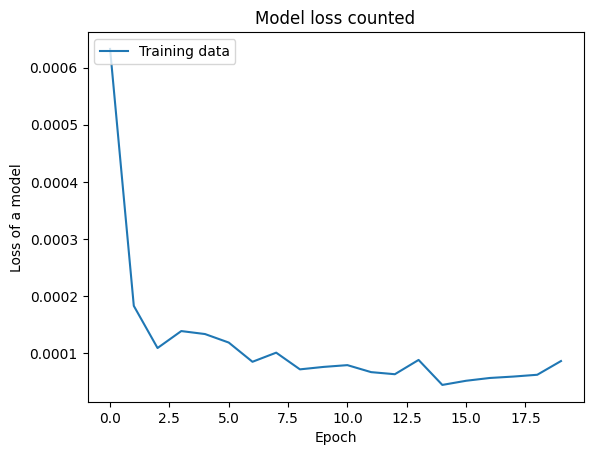

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data'], loc='upper left')
plt.show()

In [ ]:
X_test = []
y_test = []

for i in range(len(test) - step_count):
    X_test.append(scaled_testing_set[i:i + step_count, 0])
    y_test.append(scaled_testing_set[step_count + i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = y_test.reshape(y_test.shape[0])

print(X_test.shape, y_test.shape)

(374, 50) (374,)


In [ ]:
#train the model
history = cnn_model.fit(X_test, y_test, batch_size=16, epochs=20)

Epoch 1/20
24/24 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 9.7287e-04
Epoch 3/20
24/24 [==============================] - 0s 5ms/step - loss: 7.0684e-04
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 8.4439e-04
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 7.2911e-04
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 9.1985e-04
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 7.6615e-04
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 8.4027e-04
Epoch 9/20
24/24 [==============================] - 0s 3ms/step - loss: 6.8532e-04
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - loss: 6.4934e-04
Epoch 11/20
24/24 [==============================] - 0s 3ms/step - loss: 7.7517e-04
Epoch 12/20
24/24 [==============================] - 0s 3ms/step - loss: 5.8363e-04
Epoch

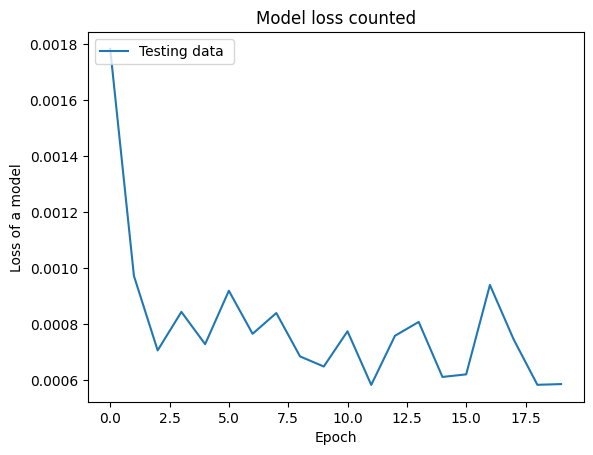

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Testing data '], loc='upper left')
plt.show()

In [ ]:
predict = cnn_model.predict(X_test)
predict_original_scale = predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test_original = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

12/12 [==============================] - 0s 3ms/step


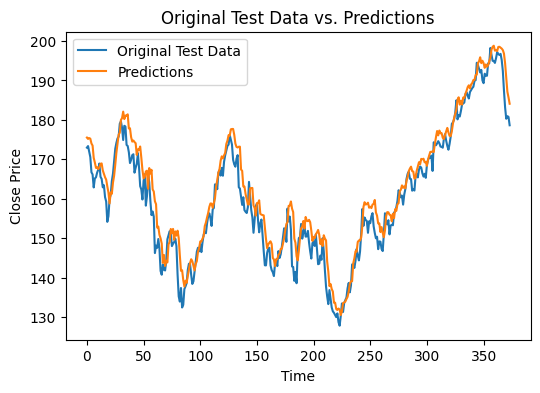

In [ ]:
plt.figure(figsize=(6, 4))

# Plot original test data
plt.plot(y_test_original, label='Original Test Data')

# Plot predicted data
plt.plot(predict_original_scale, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Original Test Data vs. Predictions')
plt.legend()
plt.savefig('Mishtha test and actual prediction')
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(y_test_original, predict_original_scale)
mse = mean_square_error(y_test_original, predict_original_scale)
rmse = root_mean_square_error(y_test_original, predict_original_scale)
print(' model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

 model performance
RMSE: 4.518191700137664
MSE: 20.414056239192874
MAPE: 2.1748829438420945


In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predict_original_scale[:10]):
    print(f"{date.date()}: {price}")

2023-08-12: [168.10645]
2023-08-13: [169.3323]
2023-08-14: [171.71396]
2023-08-15: [170.06557]
2023-08-16: [168.68713]
2023-08-17: [166.3757]
2023-08-18: [164.30885]
2023-08-19: [162.40747]
2023-08-20: [162.10796]
2023-08-21: [164.32965]


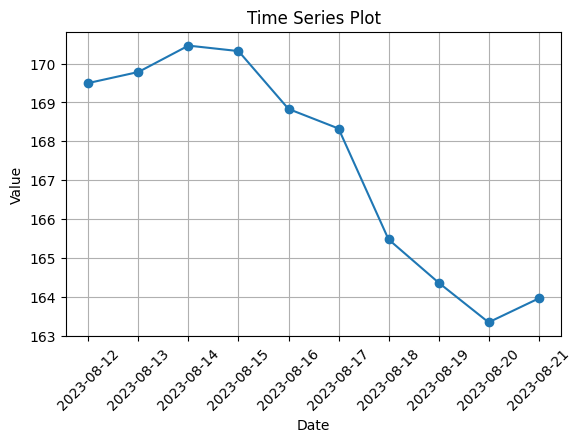

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    168.10,
    169.33,
    171.713,
    170.06,
    168.68,
    166.37,
    164.30,
    162.40,
    162.10,
    164.30
]

# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('mishtha forecasting')
plt.show()

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## setting the start and end date
start_date = '1990-01-01'
end_date = '2023-08-14'
ticker = 'AAPL'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02    0.314732    0.334821    0.312500    0.332589    0.263761   
1990-01-03    0.339286    0.339286    0.334821    0.334821    0.265531   
1990-01-04    0.341518    0.345982    0.332589    0.335938    0.266417   
1990-01-05    0.337054    0.341518    0.330357    0.337054    0.267302   
1990-01-08    0.334821    0.339286    0.330357    0.339286    0.269072   
...                ...         ...         ...         ...         ...   
2023-08-07  182.130005  183.130005  177.350006  178.850006  178.608810   
2023-08-08  179.690002  180.270004  177.580002  179.800003  179.557526   
2023-08-09  180.869995  180.929993  177.009995  178.190002  177.949707   
2023-08-10  179.479996  180.750000  177.600006  177.970001  177.729996   
2023-08-11  177.320007  178.619995  176.550

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8468 entries, 1990-01-02 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8468 non-null   float64
 1   High       8468 non-null   float64
 2   Low        8468 non-null   float64
 3   Close      8468 non-null   float64
 4   Adj Close  8468 non-null   float64
 5   Volume     8468 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 463.1 KB


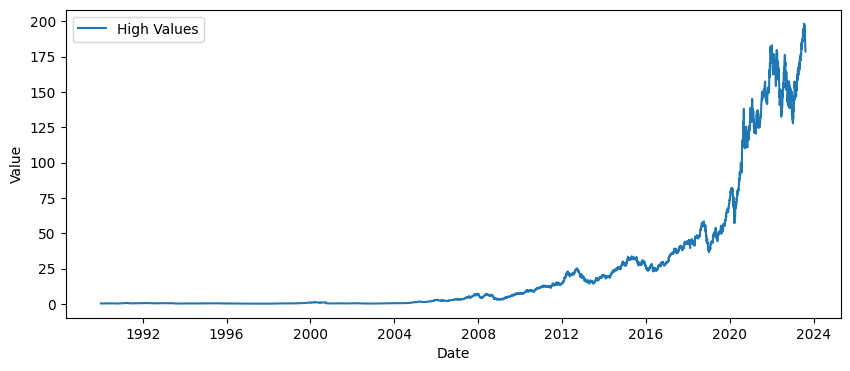

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('mishtha apple high price')
plt.show()

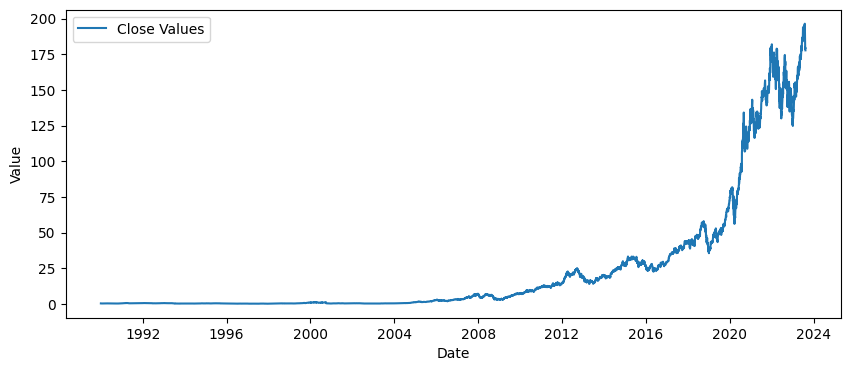

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('mishtha apple close price')
plt.show()

In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263761,183198400
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265531,207995200
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266417,221513600
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267302,123312000
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269072,101572800
...,...,...,...,...,...,...,...
8463,2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100
8464,2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
8465,2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
8466,2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900


<ipython-input-7-3c852398583e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


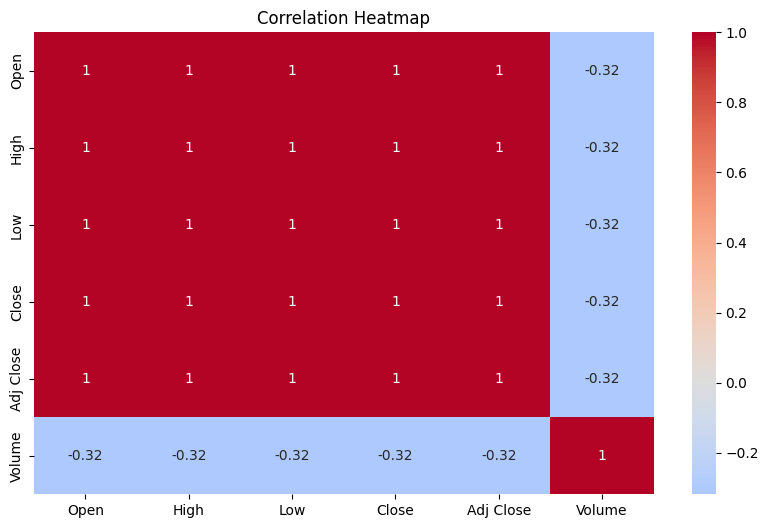

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('heatmap')
plt.show()

In [ ]:
# Define the size of the training set
train_size = int(len(df) * 0.95)  # 95% of the data for training

# Split the data into training and testing sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print the shapes of the split sets
print(train.shape, test.shape)

(8044, 7) (424, 7)


In [ ]:
training_data = train.filter(['High'])
training_set = training_data.values
testing_data = test.filter(['High'])
testing_set = testing_data.values
print(training_set.shape, testing_set.shape)

(8044, 1) (424, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
scaled_training_set = scaler.fit_transform(training_set)
# Scale the test dataset using the same scaler
scaled_testing_set = scaler.transform(testing_set)

print(scaled_training_set.shape, scaled_testing_set.shape)

(8044, 1) (424, 1)


In [ ]:
step_count = 50
X_train = []
y_train = []

for i in range(len(train) - step_count):
    X_train.append(scaled_training_set[i:i + step_count, 0])
    y_train.append(scaled_training_set[step_count + i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = y_train.reshape(y_train.shape[0])

print(X_train.shape, y_train.shape)

(7994, 50) (7994,)


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

length = 50  # Number of time steps in the input sequence
n_features = 1  # Number of features at each time step

model = Sequential()

# Add a Simple RNN layer with 30 units and input shape (length, n_features)
model.add(SimpleRNN(30, input_shape=(length, n_features)))

# Add a Dropout layer with dropout rate 0.2
model.add(Dropout(rate=0.2))

# Add a Dense output layer with 1 unit (for regression)
model.add(Dense(1))

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
500/500 [==============================] - 6s 8ms/step - loss: 0.0022
Epoch 2/20
500/500 [==============================] - 4s 8ms/step - loss: 7.4197e-04
Epoch 3/20
500/500 [==============================] - 5s 11ms/step - loss: 4.8416e-04
Epoch 4/20
500/500 [==============================] - 4s 8ms/step - loss: 4.5251e-04
Epoch 5/20
500/500 [==============================] - 4s 8ms/step - loss: 4.0055e-04
Epoch 6/20
500/500 [==============================] - 6s 11ms/step - loss: 4.0556e-04
Epoch 7/20
500/500 [==============================] - 4s 9ms/step - loss: 3.5550e-04
Epoch 8/20
500/500 [==============================] - 5s 9ms/step - loss: 3.5155e-04
Epoch 9/20
500/500 [==============================] - 5s 9ms/step - loss: 3.3643e-04
Epoch 10/20
500/500 [==============================] - 4s 8ms/step - loss: 3.4167e-04
Epoch 11/20
500/500 [==============================] - 5s 10ms/step - loss: 3.8841e-04
Epoch 12/20
500/500 [==============================] - 4s 9ms/st

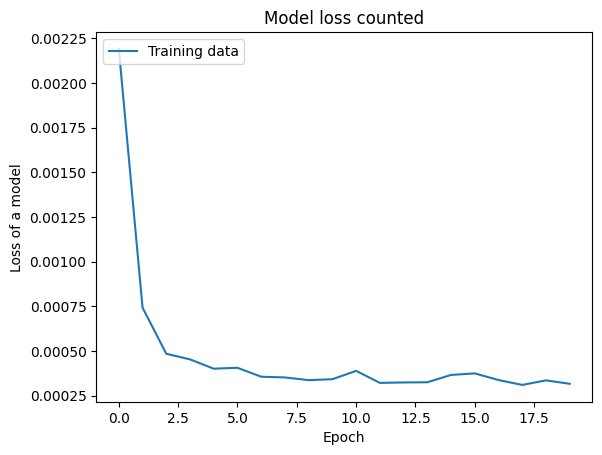

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data'], loc='upper left')
plt.show()

In [ ]:
X_test = []
y_test = []

for i in range(len(test) - step_count):
    X_test.append(scaled_testing_set[i:i + step_count, 0])
    y_test.append(scaled_testing_set[step_count + i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = y_test.reshape(y_test.shape[0])

print(X_test.shape, y_test.shape)

(374, 50) (374,)


In [ ]:
#train the model
history = model.fit(X_test, y_test, batch_size=16, epochs=20)

Epoch 1/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 3/20
24/24 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 4/20
24/24 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 5/20
24/24 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 6/20
24/24 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 7/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 8/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 9/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 10/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0046
Epoch 11/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 12/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 13/20
24/24 [=============================

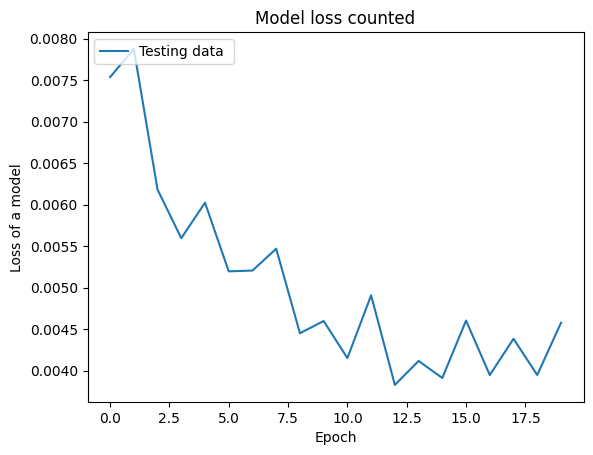

In [ ]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Testing data '], loc='upper left')
plt.show()

In [ ]:
predict = model.predict(X_test)
predict_original_scale = predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test_original = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

12/12 [==============================] - 0s 5ms/step


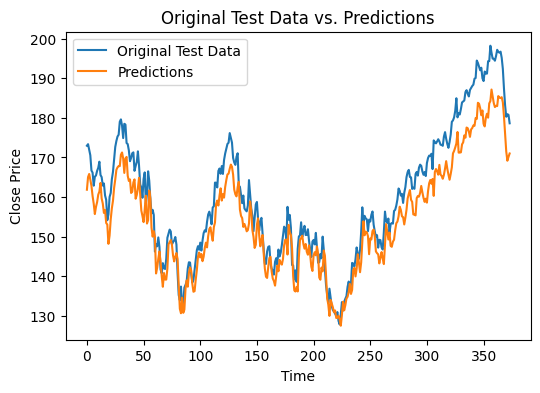

In [ ]:
plt.figure(figsize=(6, 4))

# Plot original test data
plt.plot(y_test_original, label='Original Test Data')

# Plot predicted data
plt.plot(predict_original_scale, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Original Test Data vs. Predictions')
plt.legend()
plt.savefig('Mishtha test and actual prediction')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - predict_original_scale) / y_test_original)) * 100

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, predict_original_scale)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Testing phase model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Testing phase model performance
RMSE: 6.594382578552401
MSE: 43.48588159231541
MAPE: 10.805935896041696


In [ ]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predict_original_scale[:10]):
    print(f"{date.date()}: {price}")


2023-08-12: [161.82681]
2023-08-13: [165.0141]
2023-08-14: [165.80693]
2023-08-15: [164.39798]
2023-08-16: [162.79999]
2023-08-17: [160.23888]
2023-08-18: [158.30328]
2023-08-19: [155.67717]
2023-08-20: [157.49068]
2023-08-21: [158.69325]


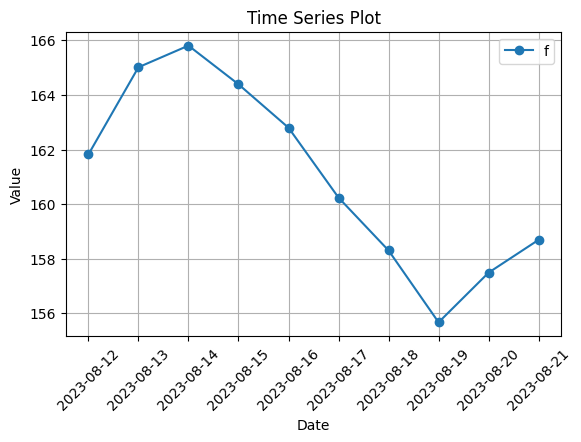

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-12',
    '2023-08-13',
    '2023-08-14',
    '2023-08-15',
    '2023-08-16',
    '2023-08-17',
    '2023-08-18',
    '2023-08-19',
    '2023-08-20',
    '2023-08-21'
]

values = [
    161.82,
    165.0141,
    165.8069,
    164.39,
    162.799,
    160.238,
    158.303,
    155.67,
    157.490,
    158.693
]
# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.legend('forecasting of apple stock')
plt.savefig('mishtha forecasting')
plt.show()